
## 참조자료

https://pinkwink.kr/1119

# 1. 타이타닉 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('dataset/titanic.csv', encoding='utf-8')

In [3]:
titanic.shape

(887, 8)

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 성별을 숫자로 변환하기

In [5]:
titanic['Sex'] = titanic['Sex'].str.replace('female',"1")
titanic['Sex'] = titanic['Sex'].str.replace('male','0.')

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.,35.0,0,0,8.0500


In [7]:
titanic['Sex'].value_counts()

0.    573
1     314
Name: Sex, dtype: int64

In [8]:
titanic['Sex'] = titanic['Sex'].astype('float')

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0.0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1.0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1.0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1.0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0.0,35.0,0,0,8.0500


## 정수를 실수로 변환하기

In [10]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [11]:
titanic['Survived'] = titanic['Survived'].astype('float')
titanic['Pclass'] = titanic['Pclass'].astype('float')


In [12]:
titanic.dtypes

Survived                   float64
Pclass                     float64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [13]:
titanic.values

array([[0.0, 3.0, 'Mr. Owen Harris Braund', ..., 1, 0, 7.25],
       [1.0, 1.0, 'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
        ..., 1, 0, 71.2833],
       [1.0, 3.0, 'Miss. Laina Heikkinen', ..., 0, 0, 7.925],
       ...,
       [0.0, 3.0, 'Miss. Catherine Helen Johnston', ..., 1, 2, 23.45],
       [1.0, 1.0, 'Mr. Karl Howell Behr', ..., 0, 0, 30.0],
       [0.0, 3.0, 'Mr. Patrick Dooley', ..., 0, 0, 7.75]], dtype=object)

## 학습 및 테스트 데이터로 분리하기

   pclass , Sex, Age, Fare를 가지고 구하기 

In [14]:
x_data = titanic.values[:, [1,3,7]]
y_data = titanic.values[:, [0]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [15]:
X_train.shape

(798, 3)

In [16]:
X_test.shape

(89, 3)

# 2. 모델 만들기

In [17]:
import keras

Using TensorFlow backend.


In [18]:
keras.__version__

'2.3.1'

In [19]:
import tensorflow as tf 

In [20]:
tf.keras.__version__

'2.3.0-tf'

In [21]:
from keras import  models
from keras import  layers

## 히든 1, 출력 1로 정의하기

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Dense(255, activation='relu', input_shape=(3,)))

In [24]:
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 255)               1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 256       
Total params: 1,276
Trainable params: 1,276
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

## 학습하기

In [27]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Train on 798 samples, validate on 89 samples
Epoch 1/500
798/798 [==============================] - 0s 205us/step - loss: 0.6937 - accuracy: 0.6642 - val_loss: 0.6042 - val_accuracy: 0.6854
Epoch 2/500
798/798 [==============================] - 0s 42us/step - loss: 0.5885 - accuracy: 0.6905 - val_loss: 0.5530 - val_accuracy: 0.6966
Epoch 3/500
798/798 [==============================] - 0s 38us/step - loss: 0.5681 - accuracy: 0.7005 - val_loss: 0.5251 - val_accuracy: 0.7416
Epoch 4/500
798/798 [==============================] - 0s 42us/step - loss: 0.5400 - accuracy: 0.7481 - val_loss: 0.5333 - val_accuracy: 0.7079
Epoch 5/500
798/798 [==============================] - 0s 44us/step - loss: 0.5272 - accuracy: 0.7531 - val_loss: 0.4765 - val_accuracy: 0.7865
Epoch 6/500
798/798 [==============================] - 0s 38us/step - loss: 0.5138 - accuracy: 0.7657 - val_loss: 0.4872 - val_accuracy: 0.8090
Epoch 7/500
798/798 [==============================] - 0s 40us/step - loss: 0.5302 - accur

Epoch 57/500
798/798 [==============================] - 0s 44us/step - loss: 0.4816 - accuracy: 0.7732 - val_loss: 0.4139 - val_accuracy: 0.8090
Epoch 58/500
798/798 [==============================] - 0s 35us/step - loss: 0.4939 - accuracy: 0.7782 - val_loss: 0.4147 - val_accuracy: 0.7978
Epoch 59/500
798/798 [==============================] - 0s 36us/step - loss: 0.4918 - accuracy: 0.7719 - val_loss: 0.4115 - val_accuracy: 0.7978
Epoch 60/500
798/798 [==============================] - 0s 40us/step - loss: 0.4780 - accuracy: 0.7807 - val_loss: 0.4186 - val_accuracy: 0.8315
Epoch 61/500
798/798 [==============================] - 0s 51us/step - loss: 0.4700 - accuracy: 0.7769 - val_loss: 0.4307 - val_accuracy: 0.8539
Epoch 62/500
798/798 [==============================] - 0s 47us/step - loss: 0.4720 - accuracy: 0.7807 - val_loss: 0.4134 - val_accuracy: 0.8315
Epoch 63/500
798/798 [==============================] - 0s 37us/step - loss: 0.4738 - accuracy: 0.7845 - val_loss: 0.4156 - val_ac

798/798 [==============================] - 0s 31us/step - loss: 0.4627 - accuracy: 0.7895 - val_loss: 0.4024 - val_accuracy: 0.8315
Epoch 114/500
798/798 [==============================] - 0s 43us/step - loss: 0.4672 - accuracy: 0.7782 - val_loss: 0.4313 - val_accuracy: 0.8315
Epoch 115/500
798/798 [==============================] - 0s 35us/step - loss: 0.4752 - accuracy: 0.7744 - val_loss: 0.4412 - val_accuracy: 0.8315
Epoch 116/500
798/798 [==============================] - 0s 35us/step - loss: 0.5242 - accuracy: 0.7619 - val_loss: 0.4224 - val_accuracy: 0.8315
Epoch 117/500
798/798 [==============================] - 0s 35us/step - loss: 0.4769 - accuracy: 0.7845 - val_loss: 0.4065 - val_accuracy: 0.8315
Epoch 118/500
798/798 [==============================] - 0s 65us/step - loss: 0.4693 - accuracy: 0.7882 - val_loss: 0.4033 - val_accuracy: 0.8315
Epoch 119/500
798/798 [==============================] - 0s 118us/step - loss: 0.4669 - accuracy: 0.7857 - val_loss: 0.4051 - val_accuracy

798/798 [==============================] - 0s 54us/step - loss: 0.4594 - accuracy: 0.7895 - val_loss: 0.3924 - val_accuracy: 0.8315
Epoch 170/500
798/798 [==============================] - 0s 39us/step - loss: 0.4531 - accuracy: 0.7995 - val_loss: 0.3933 - val_accuracy: 0.8315
Epoch 171/500
798/798 [==============================] - 0s 39us/step - loss: 0.4739 - accuracy: 0.7832 - val_loss: 0.4011 - val_accuracy: 0.8315
Epoch 172/500
798/798 [==============================] - 0s 46us/step - loss: 0.4720 - accuracy: 0.7882 - val_loss: 0.3926 - val_accuracy: 0.8315
Epoch 173/500
798/798 [==============================] - 0s 35us/step - loss: 0.4566 - accuracy: 0.7970 - val_loss: 0.4123 - val_accuracy: 0.8315
Epoch 174/500
798/798 [==============================] - 0s 37us/step - loss: 0.4721 - accuracy: 0.7882 - val_loss: 0.3951 - val_accuracy: 0.7978
Epoch 175/500
798/798 [==============================] - 0s 39us/step - loss: 0.4574 - accuracy: 0.7970 - val_loss: 0.3983 - val_accuracy:

798/798 [==============================] - 0s 91us/step - loss: 0.4559 - accuracy: 0.7957 - val_loss: 0.3870 - val_accuracy: 0.8315
Epoch 226/500
798/798 [==============================] - 0s 100us/step - loss: 0.4811 - accuracy: 0.7807 - val_loss: 0.4315 - val_accuracy: 0.8090
Epoch 227/500
798/798 [==============================] - 0s 100us/step - loss: 0.4841 - accuracy: 0.7807 - val_loss: 0.3878 - val_accuracy: 0.8315
Epoch 228/500
798/798 [==============================] - 0s 107us/step - loss: 0.4500 - accuracy: 0.7970 - val_loss: 0.4027 - val_accuracy: 0.8315
Epoch 229/500
798/798 [==============================] - 0s 107us/step - loss: 0.4741 - accuracy: 0.7820 - val_loss: 0.3871 - val_accuracy: 0.8315
Epoch 230/500
798/798 [==============================] - 0s 114us/step - loss: 0.4613 - accuracy: 0.7995 - val_loss: 0.3890 - val_accuracy: 0.8315
Epoch 231/500
798/798 [==============================] - 0s 93us/step - loss: 0.4619 - accuracy: 0.7982 - val_loss: 0.3866 - val_accu

798/798 [==============================] - 0s 31us/step - loss: 0.4788 - accuracy: 0.7982 - val_loss: 0.3865 - val_accuracy: 0.8315
Epoch 282/500
798/798 [==============================] - 0s 35us/step - loss: 0.4571 - accuracy: 0.7982 - val_loss: 0.3853 - val_accuracy: 0.8315
Epoch 283/500
798/798 [==============================] - 0s 30us/step - loss: 0.4570 - accuracy: 0.8008 - val_loss: 0.3861 - val_accuracy: 0.8315
Epoch 284/500
798/798 [==============================] - 0s 32us/step - loss: 0.4512 - accuracy: 0.8008 - val_loss: 0.3960 - val_accuracy: 0.8090
Epoch 285/500
798/798 [==============================] - 0s 34us/step - loss: 0.4556 - accuracy: 0.8070 - val_loss: 0.3870 - val_accuracy: 0.8315
Epoch 286/500
798/798 [==============================] - 0s 37us/step - loss: 0.4512 - accuracy: 0.7957 - val_loss: 0.3839 - val_accuracy: 0.8315
Epoch 287/500
798/798 [==============================] - 0s 35us/step - loss: 0.4506 - accuracy: 0.7995 - val_loss: 0.3852 - val_accuracy:

798/798 [==============================] - 0s 43us/step - loss: 0.4488 - accuracy: 0.7970 - val_loss: 0.3810 - val_accuracy: 0.8202
Epoch 338/500
798/798 [==============================] - 0s 32us/step - loss: 0.4471 - accuracy: 0.7920 - val_loss: 0.3834 - val_accuracy: 0.8315
Epoch 339/500
798/798 [==============================] - 0s 34us/step - loss: 0.4520 - accuracy: 0.7957 - val_loss: 0.3808 - val_accuracy: 0.8315
Epoch 340/500
798/798 [==============================] - 0s 40us/step - loss: 0.4639 - accuracy: 0.7870 - val_loss: 0.3844 - val_accuracy: 0.8315
Epoch 341/500
798/798 [==============================] - 0s 34us/step - loss: 0.4509 - accuracy: 0.7870 - val_loss: 0.3810 - val_accuracy: 0.8315
Epoch 342/500
798/798 [==============================] - 0s 31us/step - loss: 0.4562 - accuracy: 0.7995 - val_loss: 0.3820 - val_accuracy: 0.8315
Epoch 343/500
798/798 [==============================] - 0s 30us/step - loss: 0.4525 - accuracy: 0.7920 - val_loss: 0.3821 - val_accuracy:

798/798 [==============================] - 0s 41us/step - loss: 0.4442 - accuracy: 0.7982 - val_loss: 0.4051 - val_accuracy: 0.8315
Epoch 394/500
798/798 [==============================] - 0s 33us/step - loss: 0.4572 - accuracy: 0.7982 - val_loss: 0.3861 - val_accuracy: 0.8315
Epoch 395/500
798/798 [==============================] - 0s 34us/step - loss: 0.4677 - accuracy: 0.8033 - val_loss: 0.4198 - val_accuracy: 0.8202
Epoch 396/500
798/798 [==============================] - 0s 35us/step - loss: 0.4502 - accuracy: 0.7970 - val_loss: 0.3734 - val_accuracy: 0.8315
Epoch 397/500
798/798 [==============================] - 0s 35us/step - loss: 0.4480 - accuracy: 0.8045 - val_loss: 0.3905 - val_accuracy: 0.7978
Epoch 398/500
798/798 [==============================] - 0s 33us/step - loss: 0.4721 - accuracy: 0.7857 - val_loss: 0.3838 - val_accuracy: 0.8090
Epoch 399/500
798/798 [==============================] - 0s 33us/step - loss: 0.4593 - accuracy: 0.7945 - val_loss: 0.4011 - val_accuracy:

Epoch 449/500
798/798 [==============================] - 0s 45us/step - loss: 0.4451 - accuracy: 0.8020 - val_loss: 0.3814 - val_accuracy: 0.8315
Epoch 450/500
798/798 [==============================] - 0s 40us/step - loss: 0.4470 - accuracy: 0.7957 - val_loss: 0.3767 - val_accuracy: 0.8315
Epoch 451/500
798/798 [==============================] - 0s 34us/step - loss: 0.4474 - accuracy: 0.7945 - val_loss: 0.3876 - val_accuracy: 0.8315
Epoch 452/500
798/798 [==============================] - 0s 37us/step - loss: 0.4535 - accuracy: 0.7957 - val_loss: 0.3961 - val_accuracy: 0.8315
Epoch 453/500
798/798 [==============================] - 0s 39us/step - loss: 0.4556 - accuracy: 0.7945 - val_loss: 0.3849 - val_accuracy: 0.8202
Epoch 454/500
798/798 [==============================] - 0s 54us/step - loss: 0.4483 - accuracy: 0.7995 - val_loss: 0.3786 - val_accuracy: 0.8090
Epoch 455/500
798/798 [==============================] - 0s 47us/step - loss: 0.4703 - accuracy: 0.7957 - val_loss: 0.3775 -

## 학습 데이터 결과 그래프 그리기

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

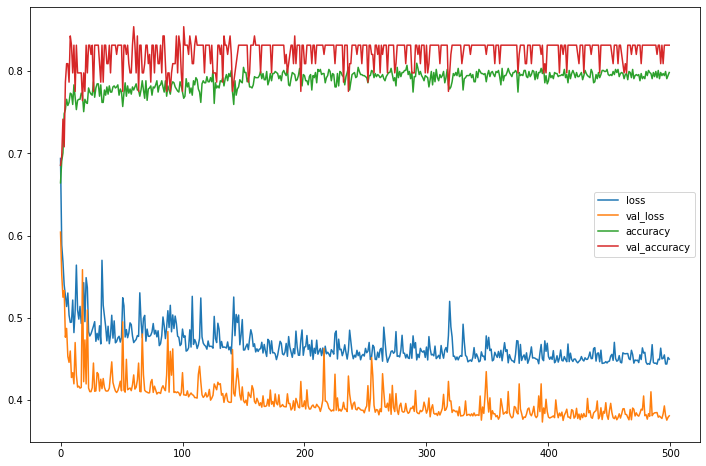

In [29]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

## 평가하기

In [30]:
model.evaluate(X_test, y_test)

89/89 [==============================] - 0s 43us/step


[0.3809369631697623, 0.8314606547355652]

In [31]:
a = model.predict(X_test)

In [32]:
import numpy as np

In [33]:
np.max(a, axis=1)

array([0.91625625, 0.13316742, 0.18182847, 0.13732189, 0.55132616,
       0.12398335, 0.9148092 , 0.22286707, 0.86008745, 0.12800163,
       0.86008745, 0.133479  , 0.3180279 , 0.97282374, 0.24078849,
       0.9735036 , 0.12800163, 0.21413338, 0.8524467 , 0.12800163,
       0.3473094 , 0.32862973, 0.34138873, 0.20458293, 0.62013954,
       0.13050583, 0.34732556, 0.07221481, 0.12087929, 0.62013954,
       0.31717646, 0.34806323, 0.13262188, 0.985263  , 0.0790523 ,
       0.1499891 , 0.9747124 , 0.11255282, 0.5658282 , 0.97944117,
       0.98171407, 0.12087929, 0.09957981, 0.02093002, 0.10447052,
       0.12024802, 0.5109954 , 0.33135355, 0.09631139, 0.62013954,
       0.12621686, 0.36492884, 0.18182847, 0.91216314, 0.20763475,
       0.10311952, 0.10697827, 0.980955  , 0.12140673, 0.34797332,
       0.3340231 , 0.12024802, 0.34579024, 0.85641015, 0.98915535,
       0.24105895, 0.31375265, 0.3178633 , 0.6163291 , 0.30000877,
       0.5583577 , 0.12398335, 0.980955  , 0.20220608, 0.85956

In [34]:
X_test[1]

array([3.0, 0.0, 29.125], dtype=object)

In [35]:
y_test[1]

array([0.0], dtype=object)

In [36]:
a[1]

array([0.13316742], dtype=float32)

## 임의의 결과를 넣고 예측하기

In [40]:
dicaprio = np.array([0., 0., 5.]).reshape(1,3)
winslet = np.array([1., 1., 100.]).reshape(1,3)

In [41]:
model.predict(dicaprio)

array([[0.47265908]], dtype=float32)

In [42]:
model.predict(winslet)

array([[0.9763554]], dtype=float32)